In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [4]:
"""Additional Information

1-10 of the data are the personal questions, 11-16. questions include family questions, and the remaining questions include education habits.

Class Labels

Student ID

1- Student Age (1: 18-21, 2: 22-25, 3: above 26)

2- Sex (1: female, 2: male)

3- Graduated high-school type: (1: private, 2: state, 3: other)

4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)

5- Additional work: (1: Yes, 2: No)

6- Regular artistic or sports activity: (1: Yes, 2: No)

7- Do you have a partner: (1: Yes, 2: No)

8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)

9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)

10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)

11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)

12- Fathersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)

13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)

14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)

15- Mothersâ€™ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)

16- Fathersâ€™ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)

17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)

18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)

19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)

20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)

21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)

22- Attendance to classes (1: always, 2: sometimes, 3: never)

23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)

24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)

25- Taking notes in classes: (1: never, 2: sometimes, 3: always)

26- Listening in classes: (1: never, 2: sometimes, 3: always)

27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)

28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)

29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

31- Course ID

32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)"""

'Additional Information\n\n1-10 of the data are the personal questions, 11-16. questions include family questions, and the remaining questions include education habits.\n\nClass Labels\n\nStudent ID\n\n1- Student Age (1: 18-21, 2: 22-25, 3: above 26)\n\n2- Sex (1: female, 2: male)\n\n3- Graduated high-school type: (1: private, 2: state, 3: other)\n\n4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)\n\n5- Additional work: (1: Yes, 2: No)\n\n6- Regular artistic or sports activity: (1: Yes, 2: No)\n\n7- Do you have a partner: (1: Yes, 2: No)\n\n8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)\n\n9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)\n\n10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)\n\n11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)\n\n12- Fathersâ€™ education: 

In [5]:
df.columns

Index(['STUDENT ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE'],
      dtype='object')

In [6]:
#change column names to the ones from the comment in the cell above
original_columns = ['STUDENT ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE']

In [7]:
new_columns = ['Student ID', 'Student Age', 'Sex', 'Graduated high-school type', 'Scholarship type',
               'Additional work', 'Regular artistic or sports activity', 'Partner',
               'Total salary', 'Transportation to the university', 'Accommodation type in Cyprus',
               'Mothers’ education', 'Fathers’ education', 'Number of sisters/brothers',
               'Parental status', 'Mothers’ occupation', 'Fathers’ occupation', 'Weekly study hours',
               'Reading frequency (non-scientific books/journals)', 'Reading frequency (scientific books/journals)',
               'Attendance to the seminars/conferences related to the department', 'Impact of your projects/activities on your success',
               'Attendance to classes', 'Preparation to midterm exams 1', 'Preparation to midterm exams 2',
               'Taking notes in classes', 'Listening in classes', 'Discussion improves my interest and success in the course',
               'Flip-classroom', 'Cumulative grade point average in the last semester (/4.00)',
               'Expected Cumulative grade point average in the graduation (/4.00)', 'Course ID', 'Grade']

df.columns = new_columns

In [8]:
df.head()

,Student ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Partner,Total salary,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),Course ID,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [9]:
#set target variable
df.drop(['Student ID'], axis=1, inplace=True)
y = df['Grade']
X = df.drop(['Grade'], axis=1)


In [10]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [12]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 4.528566321366988
Mean Absolute Error (MAE): 1.6567041311483997
R-squared Score: 0.008697266717076269

Results for Decision Tree:
Mean Squared Error (MSE): 3.4594594594594597
Mean Absolute Error (MAE): 1.5135135135135136
R-squared Score: 0.24272465622001937

Results for Random Forest:
Mean Squared Error (MSE): 2.332827027027027
Mean Absolute Error (MAE): 1.3059459459459462
R-squared Score: 0.4893443875919413

Results for SVR:
Mean Squared Error (MSE): 2.768576429115144
Mean Absolute Error (MAE): 1.4010792416481255
R-squared Score: 0.39395888528003986

Results for XGBoost:
Mean Squared Error (MSE): 2.4299104443418083
Mean Absolute Error (MAE): 1.2523957893655107
R-squared Score: 0.46809283685578273

Results for LightGBM:
Mean Squared Error (MSE): 2.4738652575730016
Mean Absolute Error (MAE): 1.237883363315635
R-squared Score: 0.45847113245643767

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 2.456320578798149


d:\python\odyn\anak2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Learning rate set to 0.028805
0:	learn: 2.1785661	total: 206ms	remaining: 3m 25s
1:	learn: 2.1501252	total: 207ms	remaining: 1m 43s
2:	learn: 2.1246855	total: 208ms	remaining: 1m 9s
3:	learn: 2.0997781	total: 208ms	remaining: 51.9s
4:	learn: 2.0814233	total: 209ms	remaining: 41.6s
5:	learn: 2.0548923	total: 210ms	remaining: 34.8s
6:	learn: 2.0349445	total: 211ms	remaining: 29.9s
7:	learn: 2.0099900	total: 211ms	remaining: 26.2s
8:	learn: 1.9864583	total: 212ms	remaining: 23.3s
9:	learn: 1.9668250	total: 213ms	remaining: 21.1s
10:	learn: 1.9438023	total: 213ms	remaining: 19.2s
11:	learn: 1.9293931	total: 214ms	remaining: 17.6s
12:	learn: 1.9094510	total: 215ms	remaining: 16.3s
13:	learn: 1.8947760	total: 216ms	remaining: 15.2s
14:	learn: 1.8724230	total: 216ms	remaining: 14.2s
15:	learn: 1.8491982	total: 217ms	remaining: 13.4s
16:	learn: 1.8384614	total: 218ms	remaining: 12.6s
17:	learn: 1.8172867	total: 219ms	remaining: 11.9s
18:	learn: 1.8015542	total: 219ms	remaining: 11.3s
19:	learn

In [13]:
accuracy

[0.008697266717076269,
 0.24272465622001937,
 0.4893443875919413,
 0.39395888528003986,
 0.46809283685578273,
 0.45847113245643767,
 0.462311660957041,
 0.4025867532751911,
 0.4204477134633835,
 -0.12115872196678201,
 0.47749677136925883]

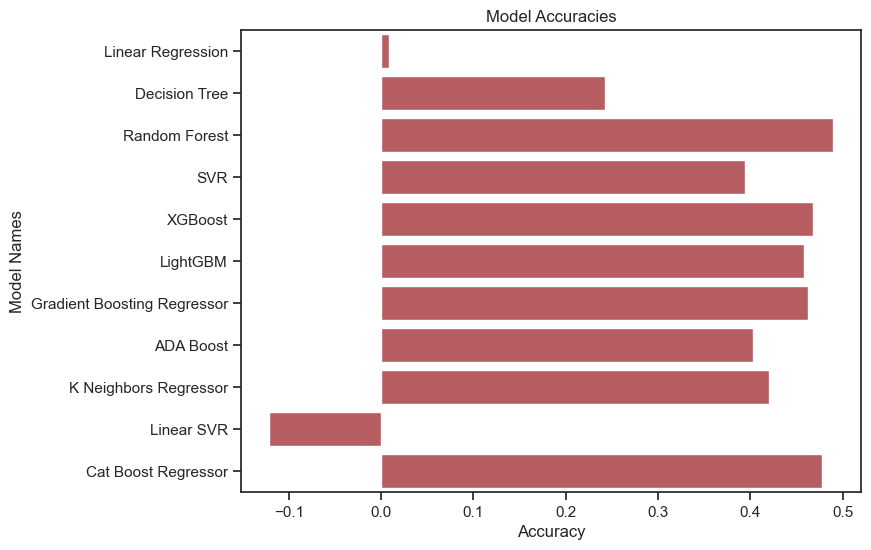

In [14]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

The best value for k neighbors in classification is: 5 with an accuracy of 0.3514


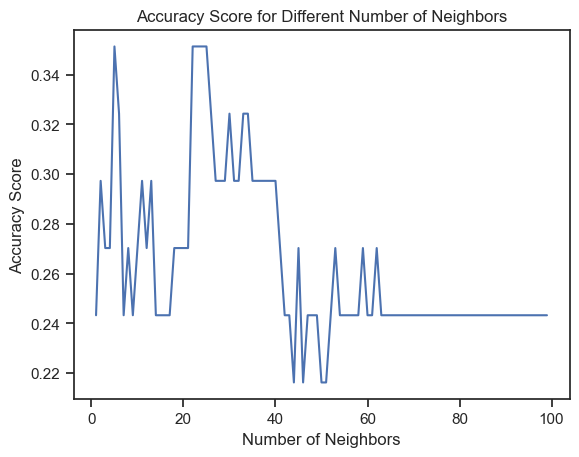

In [15]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in classification is: {best_k} with an accuracy of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Number of Neighbors')
plt.show()


The best value for k neighbors in regression is: 5 with an R-squared score of 0.4204


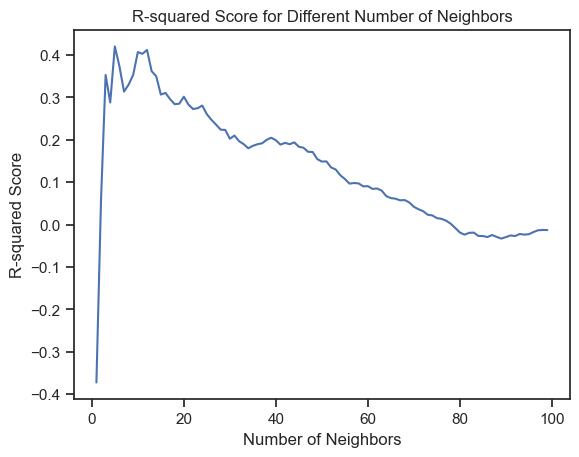

In [16]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in regression is: {best_k} with an R-squared score of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()